In [1]:
import os
os.chdir(os.path.expanduser('~/FFF/'))
import fff
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import os
import pickle as pkl
import umap
matplotlib.rcParams.update({'font.size': 18})

INFO: Using pytorch backend
/tmp/ipykernel_813795/583152811.py:8: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
classifier = False

In [3]:
if classifier:
    df = pd.read_pickle("data/Mnist_Class_data")
else:
    df = pd.read_pickle("data/28Mnist_AE5")
# read targets and conditions from dataframe
train_data, train_targets = (
    torch.from_numpy(df["train_x"]),
    torch.from_numpy(df["train_y"]),
)

center = torch.mean(train_targets)
std = torch.std(train_targets)

In [4]:
if classifier:
    GT = fff.FreeFormInjectiveFlow.load_from_checkpoint(
        "lightning_logs/classifier/version_4/checkpoints/last.ckpt"
    )
else:
    GT = fff.FreeFormInjectiveFlow.load_from_checkpoint(
    #"GTs/28Mnist_AE5/checkpoints/last.ckpt"
    "GTs/28Mnist_AE/checkpoints/last.ckpt"
    )
GT.eval()

torch.Size([60000, 28, 28])
cond_dim:  0
latent_dim:  10
[10, 512, 512, 10]
[10, 512, 512, 10]
[10, 512, 512, 10]
[10, 512, 512, 10]
[10, 512, 512, 10]
[10, 512, 512, 10]
[10, 512, 512, 10]
[10, 512, 512, 10]


FreeFormInjectiveFlow(
  (models): Sequential(
    (0): ConvolutionalNeuralNetwork(
      (model): Sequential(
        (encoder): Sequential(
          (0): Unflatten(dim=-1, unflattened_size=(1, 28, 28))
          (1): Conv2d(1, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
          (2): ReLU()
          (3): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
          (4): ReLU()
          (5): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
          (6): ReLU()
          (7): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
          (8): ReLU()
          (9): Flatten(start_dim=-3, end_dim=-1)
          (10): Linear(in_features=256, out_features=10, bias=True)
        )
        (decoder): Sequential(
          (0): Linear(in_features=10, out_features=4096, bias=True)
          (1): Unflatten(dim=-1, unflattened_size=(256, 4, 4))
          (2): ConvTranspose2d(256, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))


In [37]:
if classifier:
    model = fff.FreeFormInjectiveFlow.load_from_checkpoint(
        "lightning_logs/class_5new3mask4/version_0/checkpoints/last.ckpt"
    )
else:
    model = fff.FreeFormInjectiveFlow.load_from_checkpoint(
        "lightning_logs/28ae_L1_noise/version_0/checkpoints/last.ckpt"
    )

cond_dim:  10
latent_dim:  100
[110, 512, 512, 110]
[110, 512, 512, 110]
[110, 512, 512, 110]
[110, 512, 512, 110]
[110, 512, 512, 110]
[110, 512, 512, 110]
[110, 512, 512, 110]
[110, 512, 512, 110]
Teacher is Autoencoder
torch.Size([60000, 28, 28])
cond_dim:  0
latent_dim:  10
[10, 512, 512, 10]
[10, 512, 512, 10]
[10, 512, 512, 10]
[10, 512, 512, 10]
[10, 512, 512, 10]
[10, 512, 512, 10]
[10, 512, 512, 10]
[10, 512, 512, 10]


encoding...
reconstructing...
sampling...
[0.10841608 0.21855035 0.2240922  0.2028418  0.18393213 0.21339908
 0.233765   0.1809698  0.19890697 0.18821682]
main detail standard deviation:  tensor(1.0514)
2nd detail standard deviation:  tensor(0.8058)


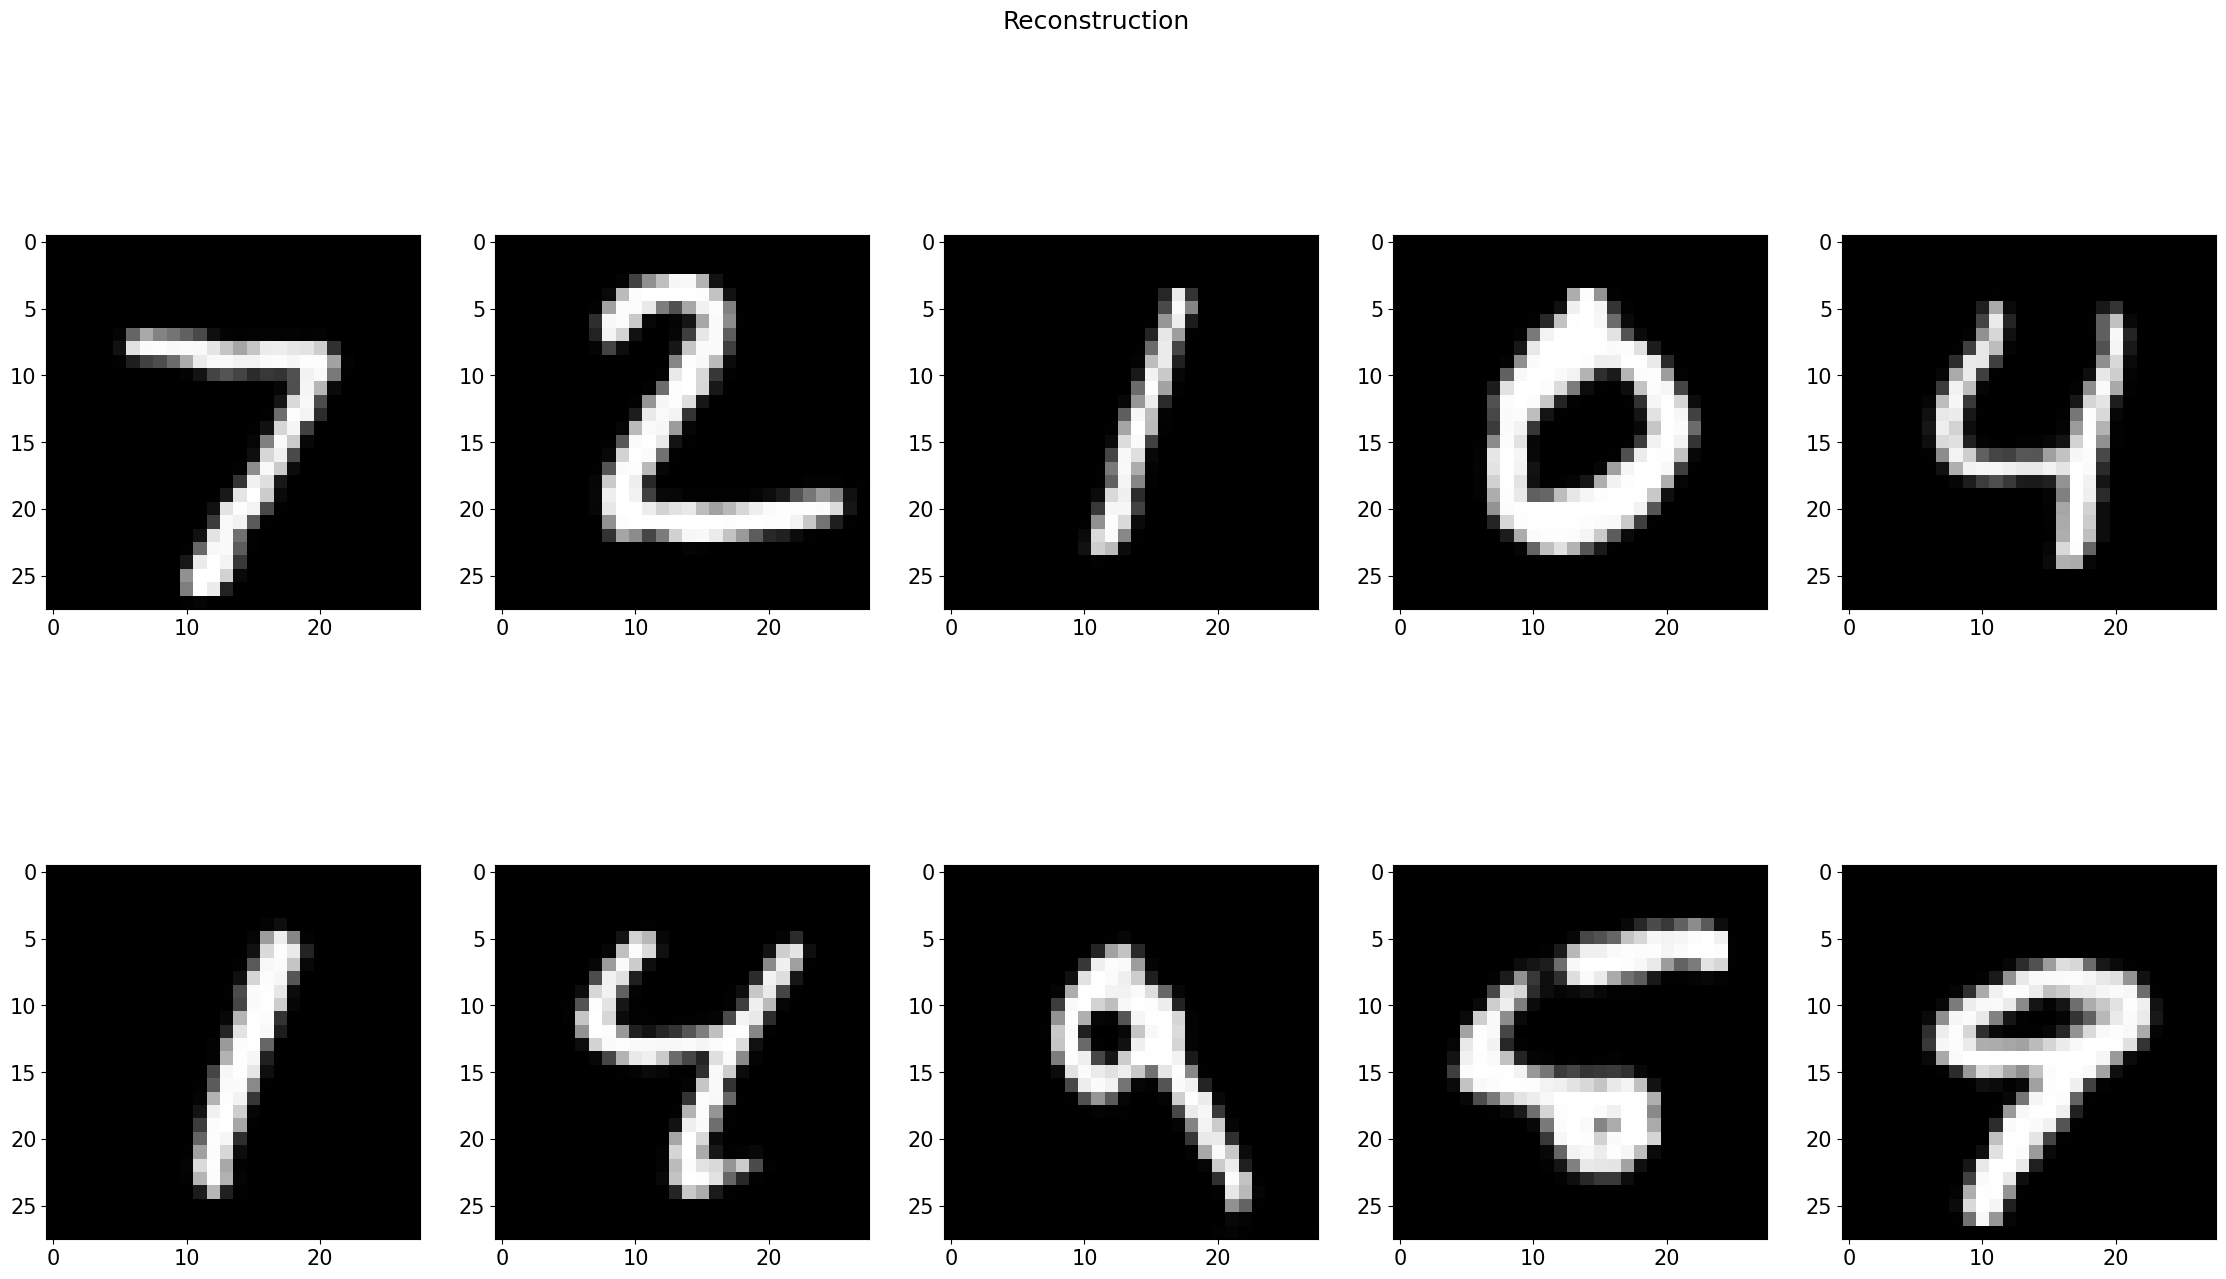

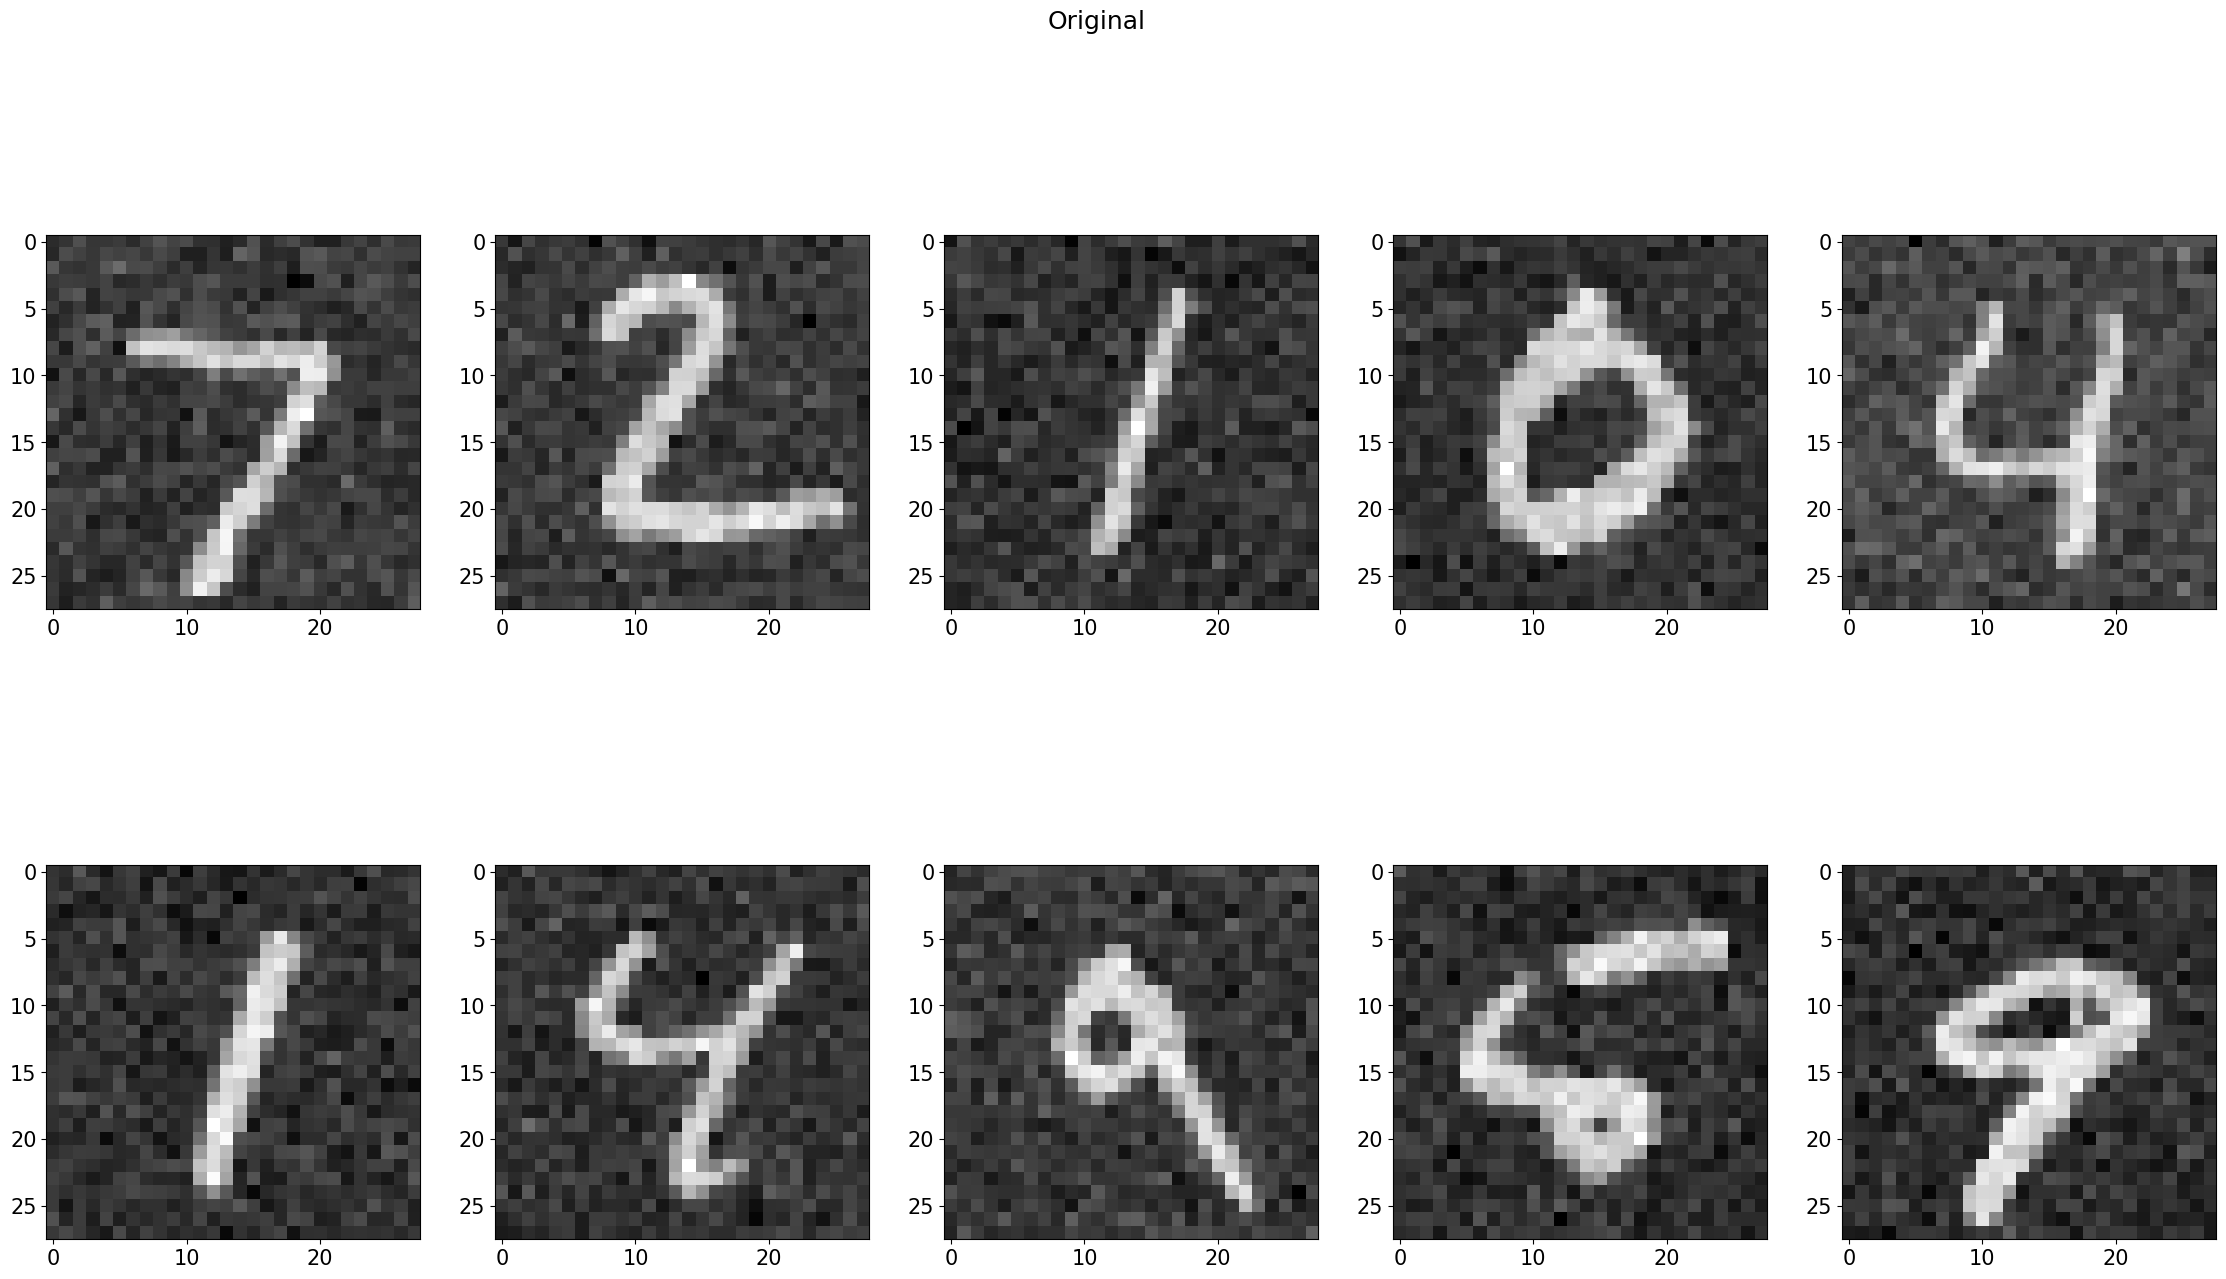

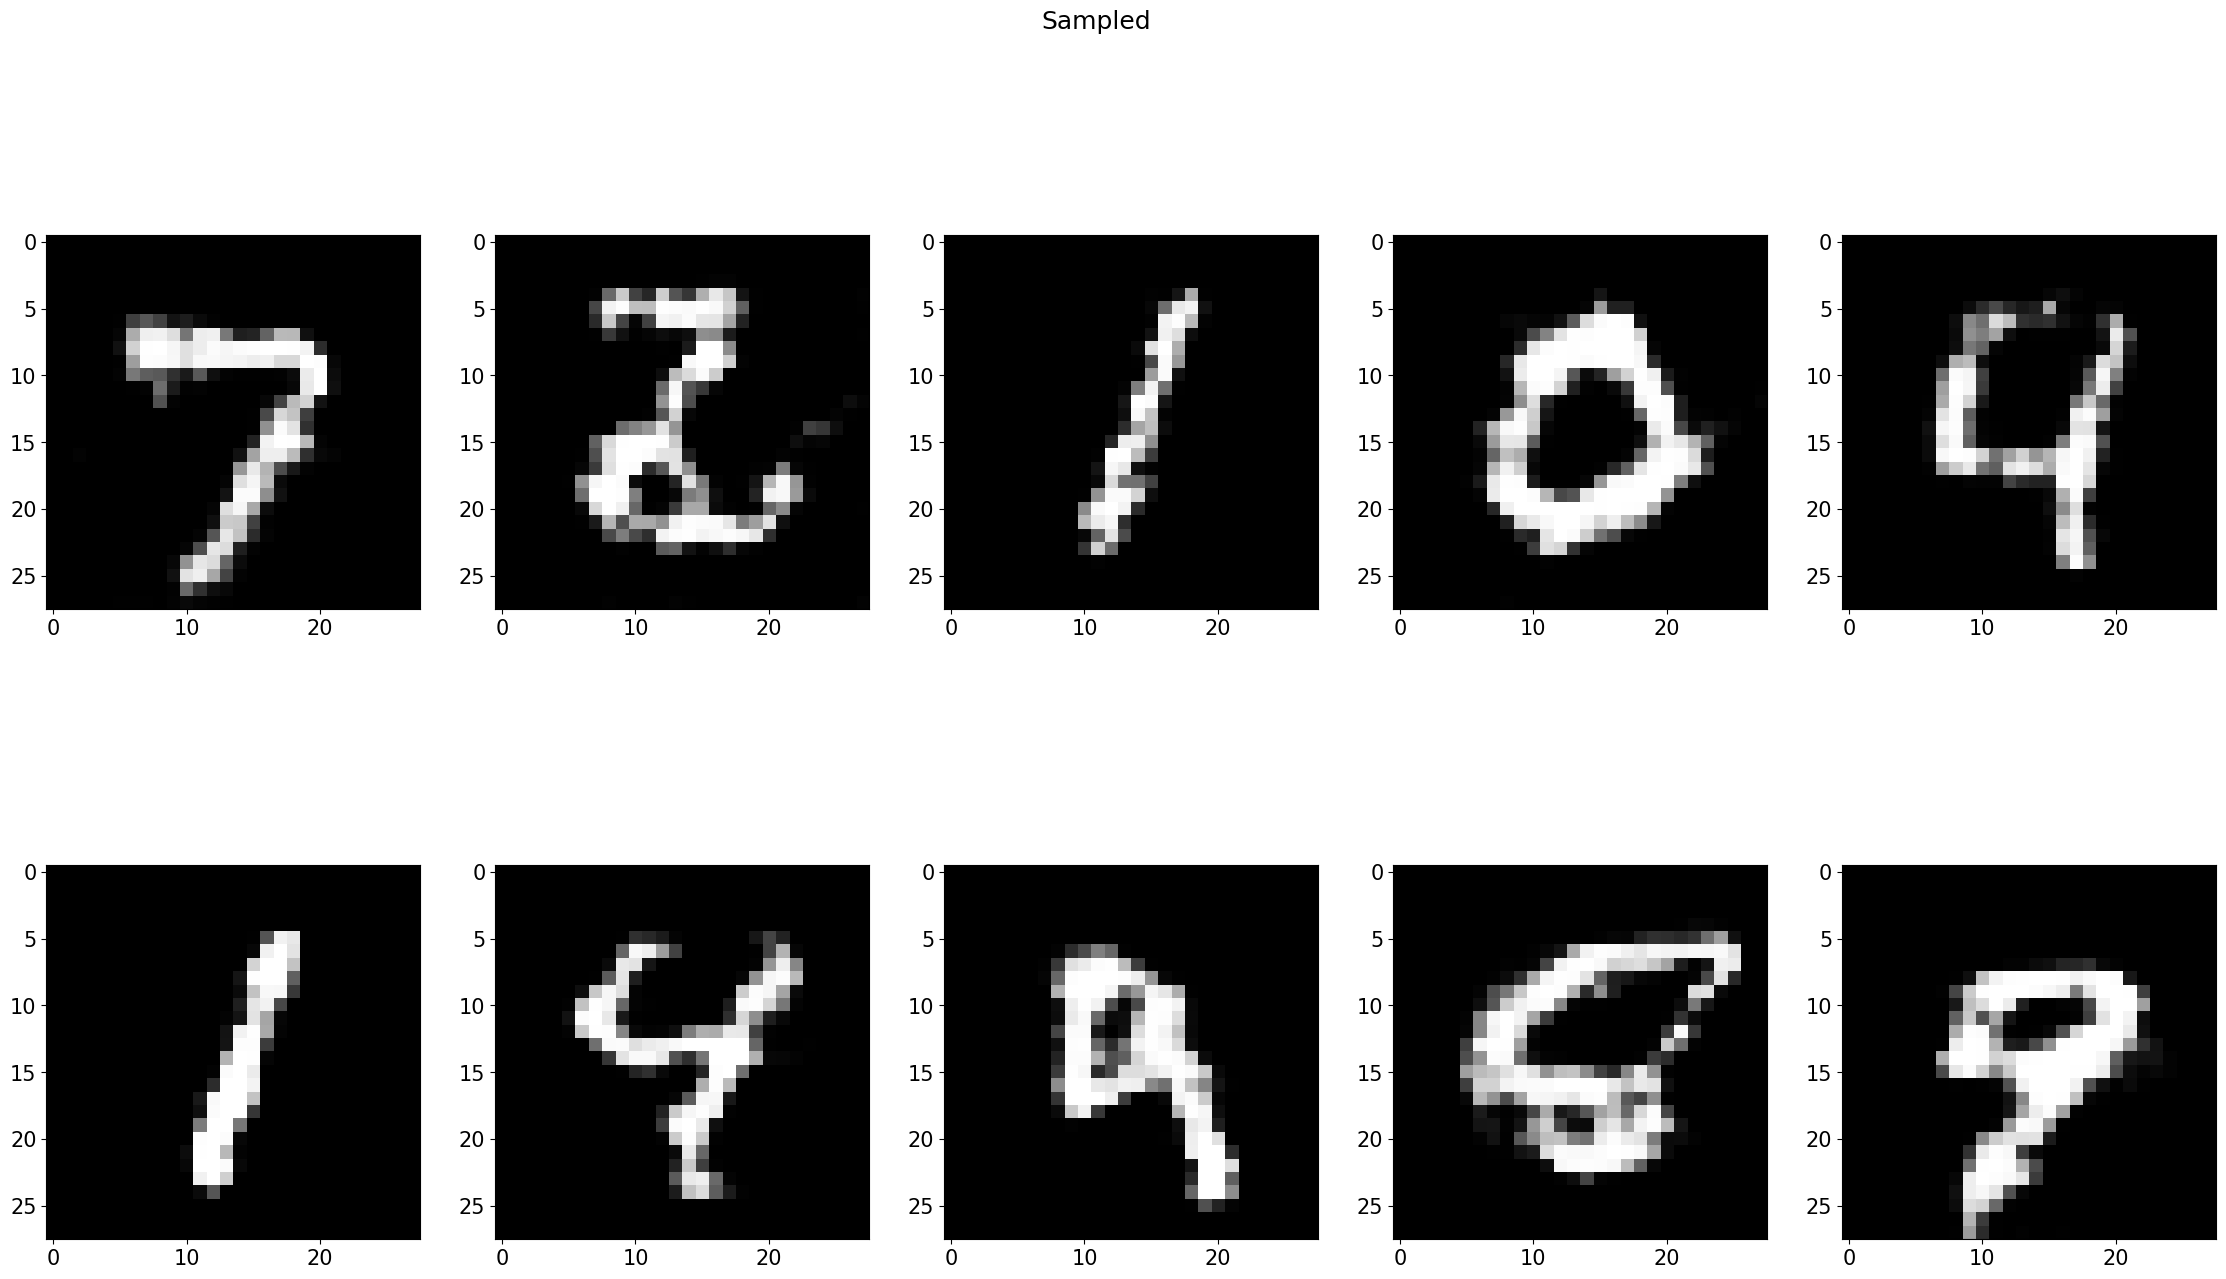

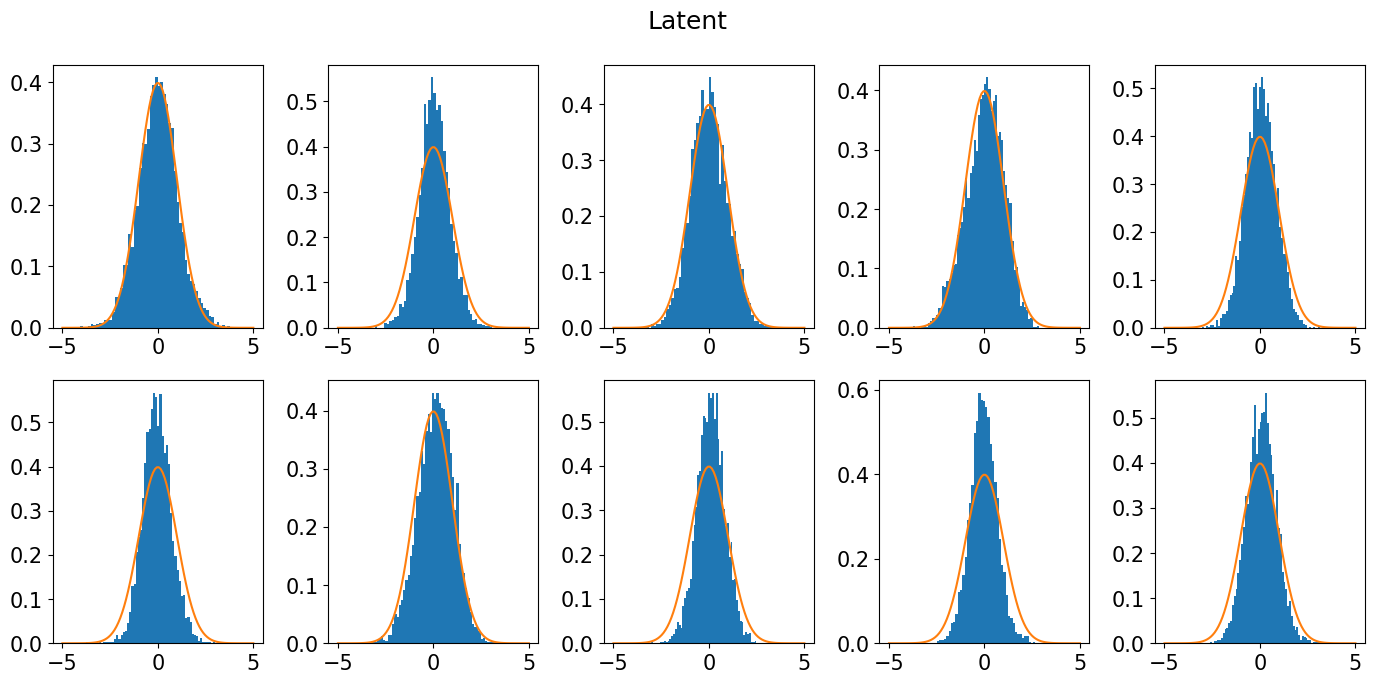

In [44]:
save = False
plot_dir = "ae5/533_mask"
data = plot_mnist(model)
z_test = data["test_z"]
std_z0 = torch.std(z_test[:,0])
print("main detail standard deviation: ", std_z0)
print("2nd detail standard deviation: ", torch.std(z_test[:,1]))
latent_dim = data["test_c"].shape[1]

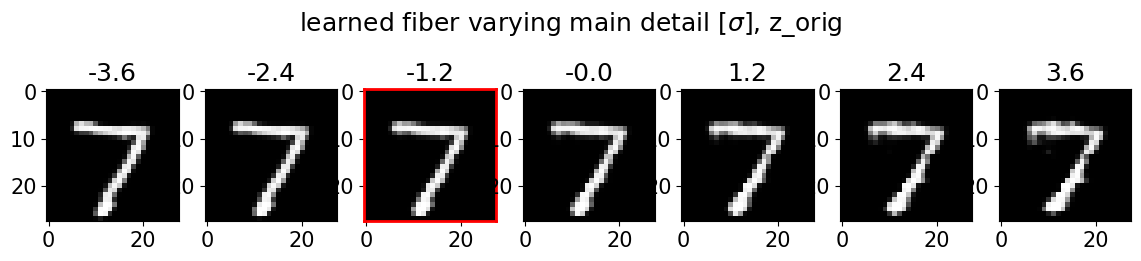

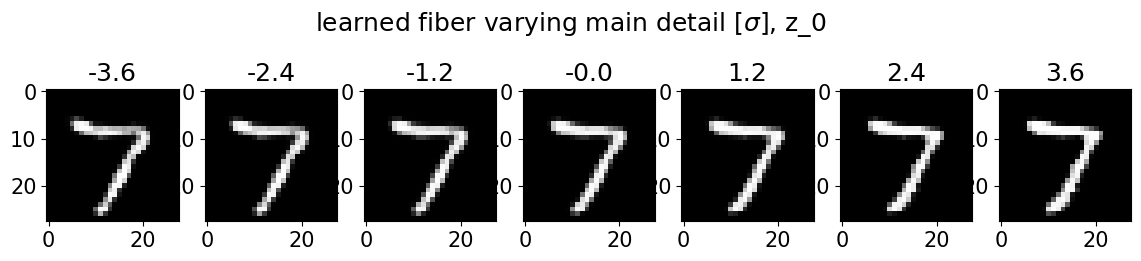

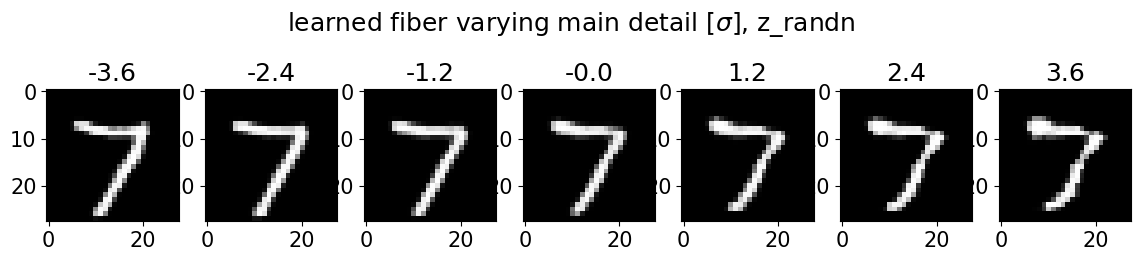

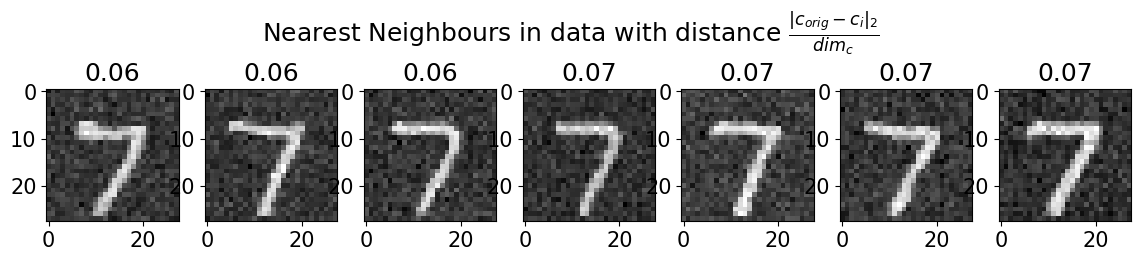

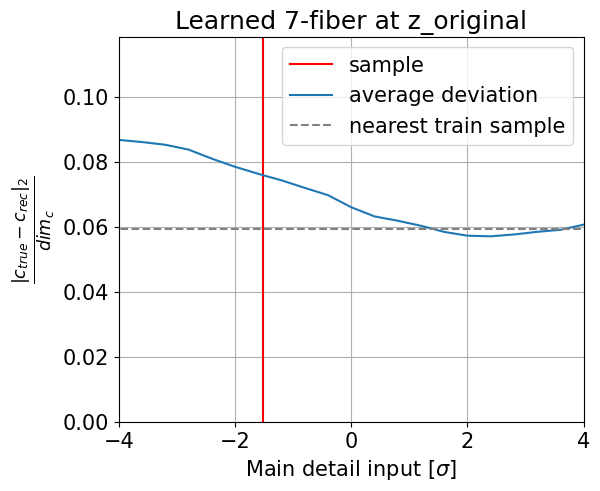

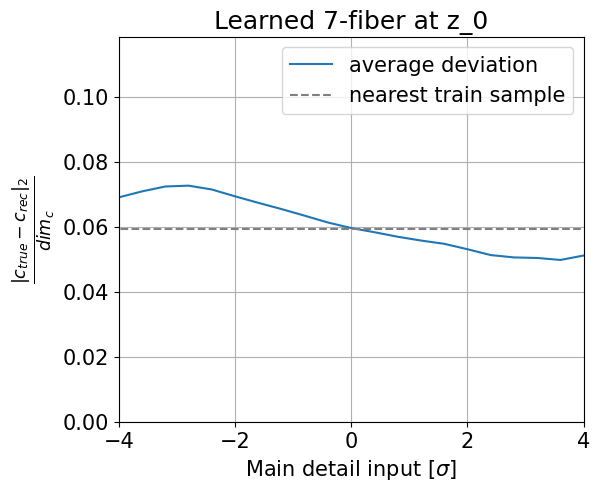

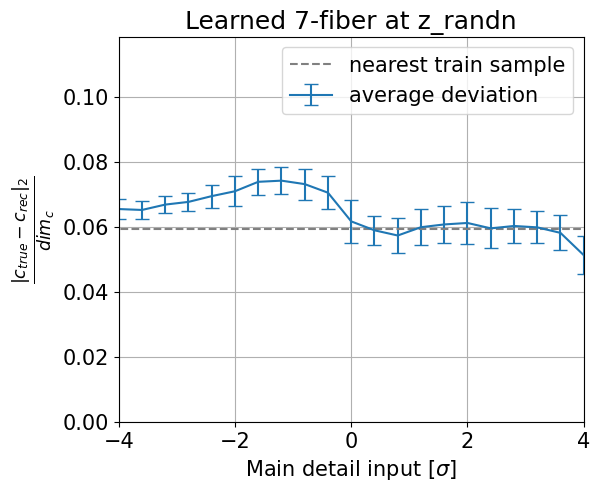

In [39]:
zrange = 4*std_z0
matplotlib.rcParams.update({'font.size': 15})
nums = [7,2,1,0,4]
z_name = ["z_original", "z_0", "z_randn"]

for j in range(1):
    xs, c_sample, z0_range, NN, z0_sample, new_details_norm = plot_details(model, data, j, zrange)
    for i, xi in enumerate(xs):
        if classifier == False:
            conditioned = GT.apply_conditions((xi,))
            c = conditioned.condition
            x = conditioned.x0
            check_fiber = (GT.encode(x.to(GT.device), c.to(GT.device)).detach().cpu() - center) / std
        else:
            conditioned = GT.apply_conditions((xi,c_sample))
            x = conditioned.x0
            c = torch.empty((x.shape[0], 0), device=x.device, dtype=x.dtype)
            check_fiber = (Features.encode(x.to(GT.device), c.to(GT.device)).detach().cpu() - center) / std
        
        #print(torch.max(check_fiber-c_sample, dim=1)[0])
                
        plt.figure(figsize=[6,5])
        if i == 0:
            delta_coarse = torch.sqrt(torch.sum((check_fiber-c_sample)**2, dim=1)).numpy()/latent_dim
            delta_details = z0_range/std_z0
            plt.axvline(x=z0_sample/std_z0, ymin=0, ymax=2,color='red', label='sample')
            plt.plot(delta_details,delta_coarse, label="average deviation")
        elif i==1:
            delta_coarse = torch.sqrt(torch.sum((check_fiber-c_sample)**2, dim=1)).numpy()/latent_dim
            delta_details = np.linspace(-zrange,zrange,z0_range.shape[0])/std_z0
            plt.plot(delta_details,delta_coarse, label="average deviation")
        else:
            delta_coarse = torch.sqrt(torch.sum((check_fiber-c_sample.repeat(40,1))**2, dim=1))/latent_dim
            delta_c_std, delta_coarse = torch.std_mean(delta_coarse.reshape(40,-1), dim=0)
            delta_coarse = delta_coarse.numpy()
            delta_details = np.linspace(-zrange,zrange,z0_range.shape[0])/std_z0
            plt.errorbar(delta_details,delta_coarse,yerr=delta_c_std, label="average deviation",capsize=5)
            
        #plotting...
        plt.axhline(y=NN, xmin=-10, xmax=10, color='gray', linestyle="--", label='nearest train sample')
        plt.title(f"Learned {nums[j]}-fiber at {z_name[i]}")
        plt.ylabel(r"$\frac{|c_{true}-c_{rec}|_2}{dim_c}$", fontsize=18)
        plt.legend()
        plt.xlabel(r"Main detail input [$\sigma$]")
        plt.ylim((0,2*NN))
        plt.xlim((-zrange/std_z0,zrange/std_z0))
        plt.grid()
        if save:
            plt.savefig(f"plots/{plot_dir}/fiber0/{nums[j]}deviation_{z_name[i]}.png", bbox_inches='tight')

tensor(4.8683)
0.042225129902362823
0.04002266377210617
0.03798602521419525
alert
4.8690972328186035
0.036169182509183884
alert
4.86997127532959
0.034432899206876755
alert
4.870953559875488
0.032809093594551086
alert
4.871565341949463
0.03130044415593147
alert
4.872409820556641
0.029910778626799583
alert
4.8731560707092285
0.0286890659481287
alert
4.873805999755859
0.027568528428673744
alert
4.874497413635254
0.026509320363402367
alert
4.87514066696167
0.02550671435892582
alert
4.875811576843262
0.024561915546655655
alert
4.876518249511719
0.023674748837947845
alert
4.877375602722168
0.022825999185442924
alert
4.877771854400635
0.02207057736814022
alert
4.878049373626709
0.02134399488568306
alert
4.878457546234131
0.020656108856201172
alert
4.878932476043701
0.01999036595225334
alert
4.879543304443359
0.019323522225022316
alert
4.880365371704102
0.018653977662324905
alert
4.881114959716797
0.017997046932578087
alert
4.881747722625732
0.017358480021357536
alert
4.882480144500732
0.01672

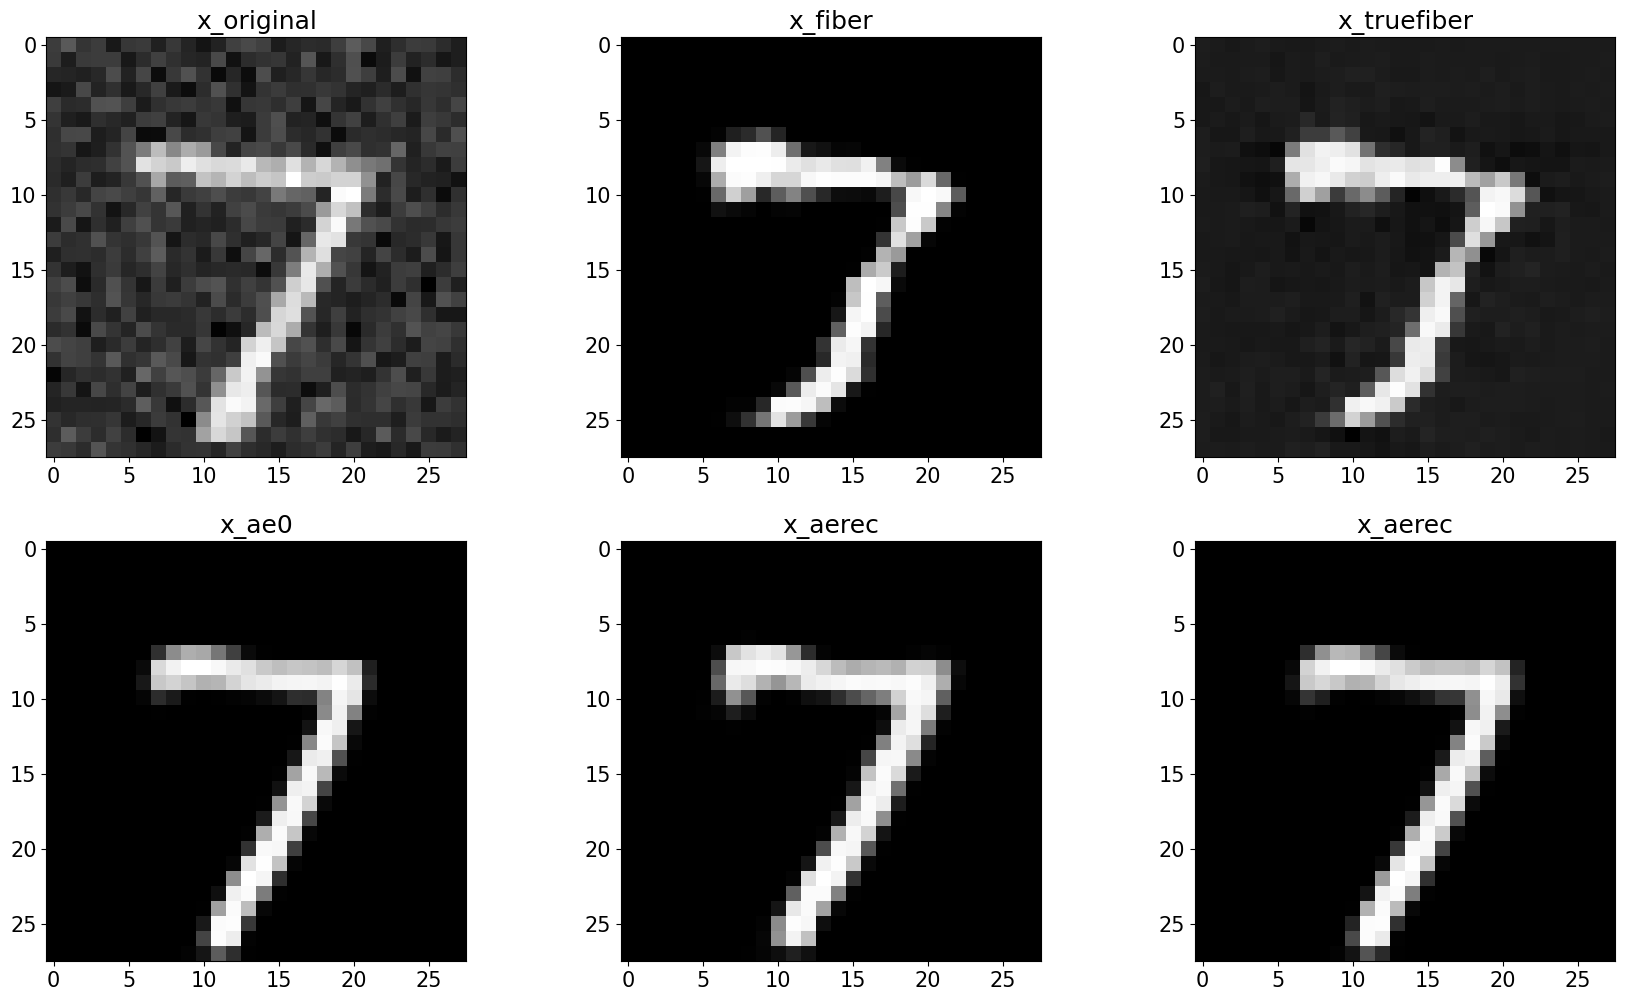

In [40]:
fiber = 2
x_orig = data["test_samples"][0]
#x_rec = torch.unsqueeze(data["test_samples"][0].clone(),dim=0)
x_rec = torch.unsqueeze(xs[fiber][-1].clone(),dim=0)
constraint = torch.mean(torch.sqrt(torch.sum(((x_orig - x_rec[0])**2), dim=-1)))
print(constraint)
c0 = torch.unsqueeze(c_sample[0].clone(),dim=0)

conditioned = GT.apply_conditions((x_rec,))
c = conditioned.condition
x = conditioned.x0
crec = GT.encode(x.to(GT.device), c.to(GT.device)).cpu()

def closs(c0, c_hat, x_hat):
    v = torch.mean(torch.sqrt(torch.sum(((c0 - c_hat)**2), dim=-1)))/latent_dim
    r = torch.max(torch.Tensor([0., (torch.sqrt(torch.sum(((xmodel.param - x_rec[0])**2), dim=-1)) - constraint).item()]))
    print(v.item())
    if r != 0:
        print(r.item())
    return v + r

class XModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.param = torch.nn.Parameter(x_rec.clone())

xmodel = XModel()
optimizer = torch.optim.SGD(xmodel.parameters(), lr=0.4)

for i in range(50):
    conditioned = GT.apply_conditions((xmodel.param,))
    c = conditioned.condition
    x = conditioned.x0
    chat = (GT.encode(x.to(GT.device), c.to(GT.device)).cpu() - center) / std
    loss = closs(c0, chat, xmodel.param)
    loss.backward()
    optimizer.step()
    check = torch.mean(torch.sqrt(torch.sum(((x_orig - xmodel.param)**2), dim=-1)))
    if check > constraint:
        print("alert")
        print(check.item())
    optimizer.zero_grad()


x_hat = xmodel.param

c0 = c0 * std + center
x_ae0 = GT.decode(c0.to(GT.device), c.to(GT.device)).cpu()

x_aerec = GT.decode(crec.to(GT.device), c.to(GT.device)).cpu()

chat = chat * std + center
x_aehat = GT.decode(chat.to(GT.device), c.to(GT.device)).cpu()

x_plot = [[x_orig, x_ae0], [x_rec, x_aerec], [x_hat, x_aehat]]
name = [["x_original", "x_ae0"], ["x_fiber","x_aerec"], ["x_truefiber", "x_aerec"]]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(21, 12))
for i in range(2):
    for j in range(3):
        axes[i,j].imshow(x_plot[j][i].detach().cpu().reshape(28, 28), cmap='gray')
        axes[i,j].set_title(name[j][i])
#plt.suptitle(r"learned fiber varying main detail [$\sigma$], z_0")
plt.show()

tensor(1.3123)


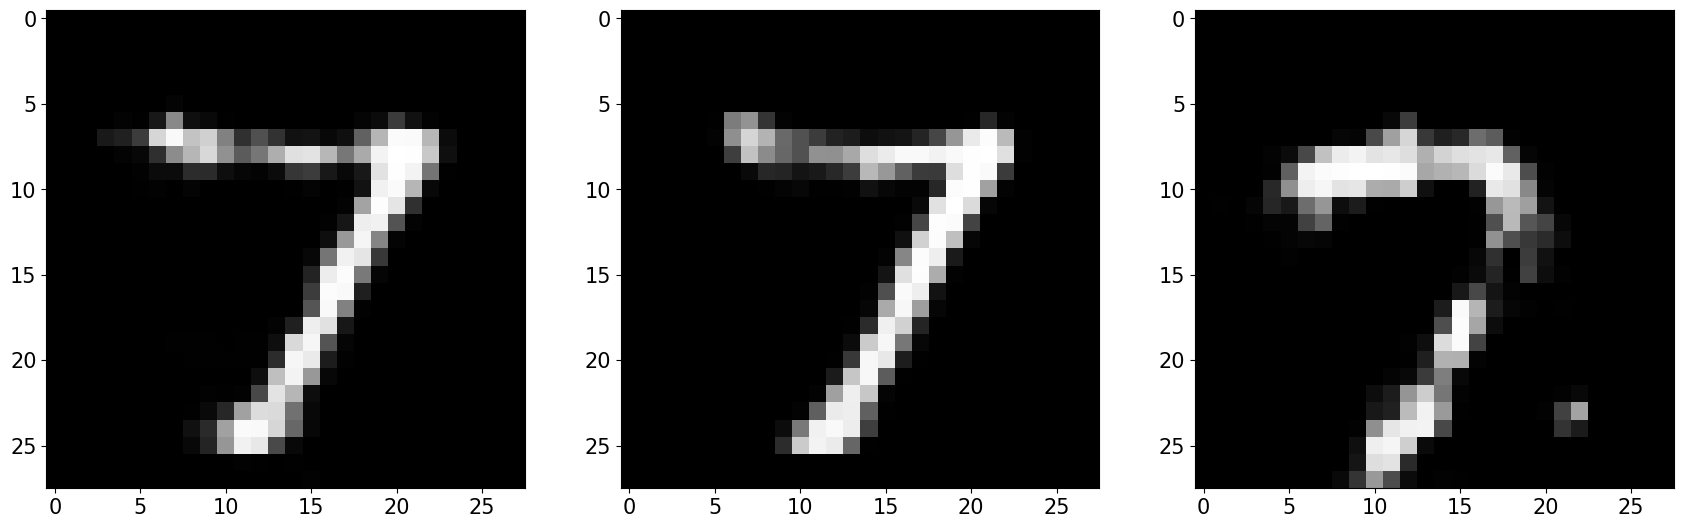

In [53]:
device = model.device


c0 = torch.unsqueeze(c_sample[0].to(device), dim=0)

details_sampled = torch.unsqueeze(new_details_norm[-1],dim=0)
x_fiber = model.decode(details_sampled.to(device), c0).detach().cpu()

x_hat = torch.unsqueeze(x_hat, dim=0)
details_true = model.encode(x_hat.to(device), c0).detach().cpu()
x_truefiber = model.decode(details_true.to(device), c0).detach().cpu()

details_diff = details_sampled - details_true
print(torch.max(details_diff))
x_diff = model.decode(details_diff.to(device), c0).detach().cpu()

x_plot = [x_fiber, x_truefiber, x_diff]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(21, 8))
for j in range(3):
    axes[j].imshow(x_plot[j].detach().cpu().reshape(28, 28), cmap='gray')

In [34]:
def plot_details(model2plot, data, sample, zrange):
    nums = [7,2,1,0,4]
    device = model2plot.device
    
    pos_min, pos_max = -zrange, zrange
    c = data["test_c"]
    z = data["test_z"]
    train_c = data["train_c"]
    train_samples = data["train_samples"]
    N = 21
    n = 7

    #calculate two walks along main detail dimension
    z0_range = torch.linspace(pos_min, pos_max, N)
    z0_range1 = z0_range.clone()
    z0_range1[torch.argmin((z0_range-z[sample][0])**2)] = z[sample][0]
    z0_sample = z[sample][0].numpy()
    
    z_list = []
    for i in range(N):
        z_new = z[sample].clone()
        z_new[0] = z0_range1[i]
        z_list.append(z_new)
    new_details1 = torch.stack(z_list)

    z_list = []
    for i in range(N):
        z_new = torch.zeros(100)
        z_new[2] = z0_range[i]
        z_list.append(z_new)
    new_details0 = torch.stack(z_list)
    #new_details0 = torch.zeros(N,53)
    #new_details0 = torch.cat([torch.unsqueeze(z0_range,1), new_details0], dim=1)
    
    new_details_norm = torch.randn(40,N,99)/10*1
    z0_range_norm = torch.unsqueeze(z0_range,0)
    z0_range_norm = z0_range_norm.repeat(40,1)
    new_details_norm = torch.cat([torch.unsqueeze(z0_range_norm,2), new_details_norm], dim=2)
    new_details_norm = torch.reshape(new_details_norm, (40*N,100))
    #print(torch.reshape(new_details_norm, (40,N,100))[0,:,0])
    
    #decoding...
    c_sample = torch.unsqueeze(c[sample], dim=0)
    c_sample_norm = c_sample.repeat(40*N,1)
    c_sample = c_sample.repeat(N,1)
    x_details1 = model2plot.decode(new_details1.to(device), c_sample.to(device)).detach().cpu()
    x_details_norm = model2plot.decode(new_details_norm.to(device), c_sample_norm.to(device)).detach().cpu()
    x_details0 = model2plot.decode(new_details0.to(device), c_sample.to(device)).detach().cpu()

    #plotting...
    fig, axes = plt.subplots(nrows=1, ncols=n, figsize=(14, 3))
    del_detail = []
    for i in range(n):
        axes[i].imshow(x_details1[i*N//n+1].cpu().reshape(28, 28), cmap='gray')
        axes[i].set_title((z0_range1[i*N//n+1]/std_z0).numpy().round(1))
        del_detail.append(z0_range1[i*N//n+1])
    del_detail = (np.array(del_detail)-z0_sample)**2
    closest = np.argmin(del_detail)
    for spine in axes[closest].spines.values():
        spine.set_edgecolor('red')
        spine.set_linewidth(2)
    plt.suptitle(r"learned fiber varying main detail [$\sigma$], z_orig")
    if save:
        plt.savefig(f"plots/{plot_dir}/fiber0/{nums[sample]}fiber_zorig.png", bbox_inches='tight')

    fig, axes = plt.subplots(nrows=1, ncols=n, figsize=(14, 3))
    for i in range(n):
        axes[i].imshow(x_details0[i*N//n+1].cpu().reshape(28, 28), cmap='gray')
        axes[i].set_title((z0_range[i*N//n+1]/std_z0).numpy().round(1))
    plt.suptitle(r"learned fiber varying main detail [$\sigma$], z_0")
    if save:
        plt.savefig(f"plots/{plot_dir}/fiber0/{nums[sample]}fiber_z0.png", bbox_inches='tight')
    
    fig, axes = plt.subplots(nrows=1, ncols=n, figsize=(14, 3))
    for i in range(n):
        axes[i].imshow(x_details_norm[i*N//n+1].cpu().reshape(28, 28), cmap='gray')
        axes[i].set_title((new_details_norm[i*N//n+1,0]/std_z0).numpy().round(1))
    plt.suptitle(r"learned fiber varying main detail [$\sigma$], z_randn")
    if save:
        plt.savefig(f"plots/{plot_dir}/fiber0/{nums[sample]}fiber_znew.png", bbox_inches='tight')

    verify = c[sample]
    diff = train_c - verify
    squared_diff = torch.sqrt(torch.sum(torch.square(diff), dim =1))
    ind = torch.argsort(squared_diff)[:n]
    #print("squared distance between chosen sample and nearest train samples:", squared_diff[ind]/5)
    similar = train_samples[ind]
    NN = squared_diff[ind[0]].numpy()/latent_dim

    fig, axes = plt.subplots(nrows=1, ncols=n, figsize=(14, 3))
    for i in range(n):
        axes[i].imshow(similar[i].cpu().reshape(28, 28), cmap='gray')
        axes[i].set_title(np.round(squared_diff[ind[i]].numpy()/latent_dim,2))
    fig.suptitle(r"Nearest Neighbours in data with distance $\frac{|c_{orig}-c_i|_2}{dim_c}$")
    if save:
        plt.savefig(f"plots/{plot_dir}/fiber0/{nums[sample]}NN.png", bbox_inches='tight')
    
    return [x_details1, x_details0, x_details_norm], c_sample, z0_range1, NN, z0_sample, new_details_norm

In [43]:
from fff.evaluate.plots import all_conditions
def plot_mnist(model2plt):
    device = model2plt.device
    
    data = {}
    train_batch = model2plt.train_data[:]
    test_batch = model2plt.test_data[:5000]

    train_conditioned = model2plt.apply_conditions(train_batch)
    train_samples = train_conditioned.x_noisy
    train_c = train_conditioned.condition
    
    test_conditioned = model2plt.apply_conditions(test_batch)
    test_c = test_conditioned.condition
    test_samples = test_conditioned.x_noisy
    
    data["train_samples"] = train_samples
    data["test_samples"] = test_samples
    data["test_c"] = test_c
    data["train_c"] = train_c

    #computing...
    print("encoding...")
    batch_size = model2plt.hparams.batch_size
    test_z = torch.cat([
        model2plt.encode(batch.to(device), c_batch.to(device)).cpu()
        for batch, c_batch in zip(test_samples.split(batch_size), test_c.split(batch_size))
    ]).detach()
    data["test_z"] = test_z
    
    print("reconstructing...")
    reconstruction = torch.cat([
        model2plt.decode(batch.to(device), c_batch.to(device)).cpu()
        for batch, c_batch in zip(test_z.split(batch_size), test_c.split(batch_size))
    ]).detach()
   
    print("sampling...") 
    z_sampled = torch.randn_like(test_z)
    x_sampled = torch.cat([
        model2plt.decode(batch.to(device), c_batch.to(device)).cpu()
        for batch, c_batch in zip(z_sampled.split(batch_size), test_c.split(batch_size))
    ]).detach()

    #plotting...
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(28, 15))
    for i in range(2):
        for j in range(5):
            axes[i][j].imshow(reconstruction[i*5 +j].cpu().reshape(28, 28), cmap='gray')
    fig.suptitle("Reconstruction")
    if save:
        plt.savefig(f"plots/{plot_dir}/reconstruction.png", bbox_inches='tight')
    
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(28, 15))
    for i in range(2):
        for j in range(5):
            axes[i][j].imshow((test_samples[i*5 +j]).cpu().reshape(28, 28), cmap='gray')
    fig.suptitle("Original")
    if save:
        plt.savefig(f"plots/{plot_dir}/original.png", bbox_inches='tight')
    
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(28, 15))
    for i in range(2):
        for j in range(5):
            axes[i][j].imshow(x_sampled[i*5 +j].cpu().reshape(28, 28), cmap='gray')
    fig.suptitle("Sampled")
    if save:
        plt.savefig(f"plots/{plot_dir}/sampled.png", bbox_inches='tight')

    #sanity check
    if classifier:
        conditioned = GT.apply_conditions((test_samples[:10],torch.zeros((10,0),device=device)))
        x_san = conditioned.x0
        c_emp = torch.empty((x_san.shape[0], 0), device=x_san.device, dtype=x_san.dtype)
        c_san = (Features.encode(x_san.to(GT.device), c_emp.to(GT.device)).detach().cpu()-center)/std
    else:
        conditioned = GT.apply_conditions((test_samples[:10],))
        c_emp = conditioned.condition
        x_san = conditioned.x0
        c_san = (GT.encode(x_san.to(GT.device), c_emp.to(GT.device)).detach().cpu()-center)/std
    sanity = torch.sqrt(torch.sum((c_san-test_c[:10])**2, dim=1)).numpy()/5
    print(sanity)
    
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(14, 7))
    a = np.linspace(-5,5,100)
    for i in range(2):
        for j in range(5):
            axes[i][j].hist(test_z[:,i*5+j], bins=60, label="Samples", density=True)
            axes[i][j].plot(a, normal(a))
    fig.suptitle("Latent")
    fig.tight_layout()
    if save:
        plt.savefig(f"plots/{plot_dir}/latent.png", bbox_inches='tight')

    return data

In [9]:
def normal(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)